# Final Project - Time Series Analysis Model
## Mishandled Bag Ratio - US Airlines Industry


In [1]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import pylab as pl
from sklearn import cross_validation
from sklearn import linear_model, metrics

%matplotlib inline

C:\Users\fcama\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
C:\Users\fcama\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#Read in data from source 
df= pd.read_csv("C:/Users/fcama/Desktop/MBR_DS_Proj/V6_HUB1_Bag_Perf.csv")
df.head()

,Year,Month,DOM,DOW,DOW2,Date,Numb_Passengers,Numb_Bags,MTD_Bags,Bag_Pass_Ratio,...,%(+/-),A0,D0,num_gate_chg,flight_div,flights_cancelled,cnl_mech,cnl_we,cnl_other,Misc_Reason
0,2015,Oct,1,Q,4-Q,10/1/2015,82356,55593.0,55593,0.675033,...,-10%,76.8,65.9,79,1,0,NaN,NaN,NaN,NaN
1,2015,Oct,2,F,5-F,10/2/2015,84667,57633.0,113226,0.680702,...,-11%,82.3,73.4,33,0,0,NaN,NaN,NaN,NaN
2,2015,Oct,3,J,6-J,10/3/2015,66117,53897.0,167123,0.815176,...,-7%,88.2,78.4,30,0,1,1.0,NaN,NaN,NaN
3,2015,Oct,4,S,7-S,10/4/2015,77920,54793.0,221916,0.703196,...,-21%,85.7,75.1,44,0,2,NaN,2.0,NaN,NaN
4,2015,Oct,5,M,1-M,10/5/2015,79765,53799.0,275715,0.674469,...,-8%,84.2,75.0,31,0,3,1.0,2.0,NaN,NaN


In [3]:
df.shape

(792, 28)

In [4]:
df.describe()

,Year,DOM,Numb_Passengers,Numb_Bags,MTD_Bags,Bag_Pass_Ratio,MTD_Bags.1,MBR_Day_Of,Count_Day_of,MBR_Goal,MBR,Met_Goal,A0,D0,flight_div,flights_cancelled,cnl_mech,cnl_we,cnl_other
count,792.000000,792.000000,792.000000,791.000000,7.920000e+02,792.000000,7.920000e+02,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,749.000000,741.000000,719.000000
mean,2016.305556,15.739899,76724.315657,58014.763590,9.128188e+05,0.757005,1.209163e+06,7.209684,548.512626,7.500013,8.338510,10.082071,67.813005,64.794697,1.924242,10.162879,1.931909,7.852901,1.075104
std,0.667141,8.809719,8214.882208,6673.302795,5.168596e+05,0.065467,6.841066e+05,4.037844,284.182265,1.538176,5.456703,26.314438,14.692872,13.688053,6.873928,29.226652,3.214175,27.355195,4.307140
min,2015.000000,1.000000,42819.000000,30939.000000,4.955800e+04,0.000000,6.378800e+04,2.730000,160.000000,4.200000,3.340000,0.000000,9.300000,7.600000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.000000,8.000000,71437.000000,53638.500000,4.679152e+05,0.722876,6.103290e+05,4.847500,380.000000,6.550000,5.410000,0.000000,62.100000,58.800000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,2016.000000,16.000000,77834.000000,58104.000000,9.075525e+05,0.745020,1.211555e+06,6.185000,470.000000,7.400000,6.890000,1.000000,71.400000,68.550000,0.000000,2.000000,1.000000,0.000000,0.000000
75%,2017.000000,23.000000,82686.500000,62407.500000,1.350171e+06,0.784157,1.794716e+06,8.270000,636.250000,8.600000,9.397500,1.000000,78.400000,74.200000,1.000000,7.000000,3.000000,3.000000,1.000000
max,2017.000000,31.000000,98333.000000,77146.000000,2.001835e+06,1.009308,2.595067e+06,46.390000,2800.000000,10.400000,65.120000,123.000000,91.500000,87.000000,67.000000,365.000000,56.000000,353.000000,73.000000


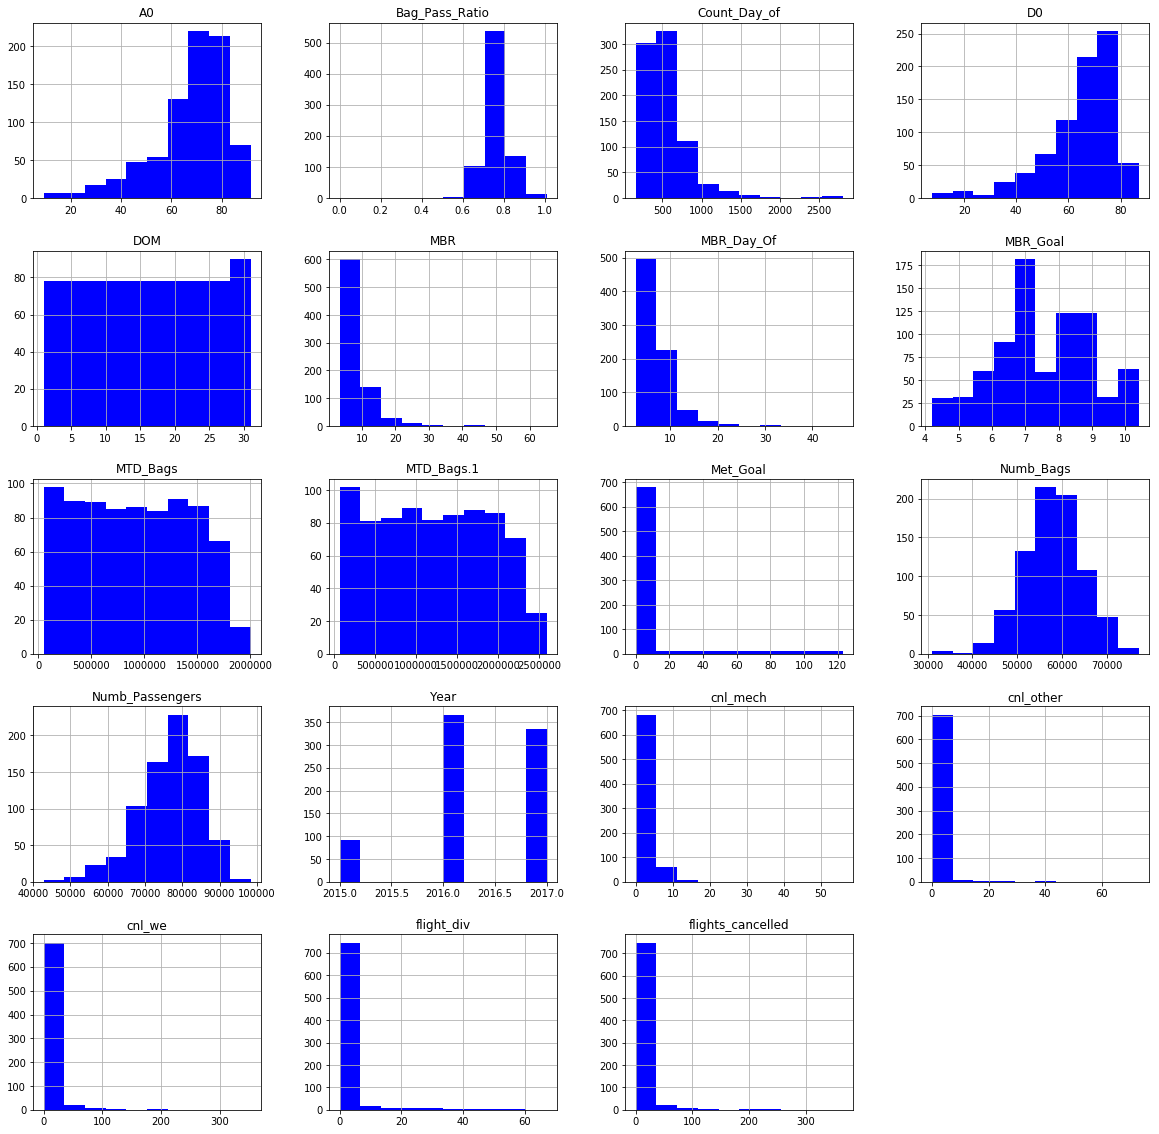

In [5]:
df.hist(color='blue', figsize=(20,20))
pl.show()

In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

## US Calendar Holiday

In [7]:
from pandas.tseries.holiday import USFederalHolidayCalendar   # US holiday calendar
from pandas.tseries.offsets import CustomBusinessDay
usb = CustomBusinessDay(calendar=USFederalHolidayCalendar())  # Excludes holidays, maybe for detrending
usb

<CustomBusinessDay>

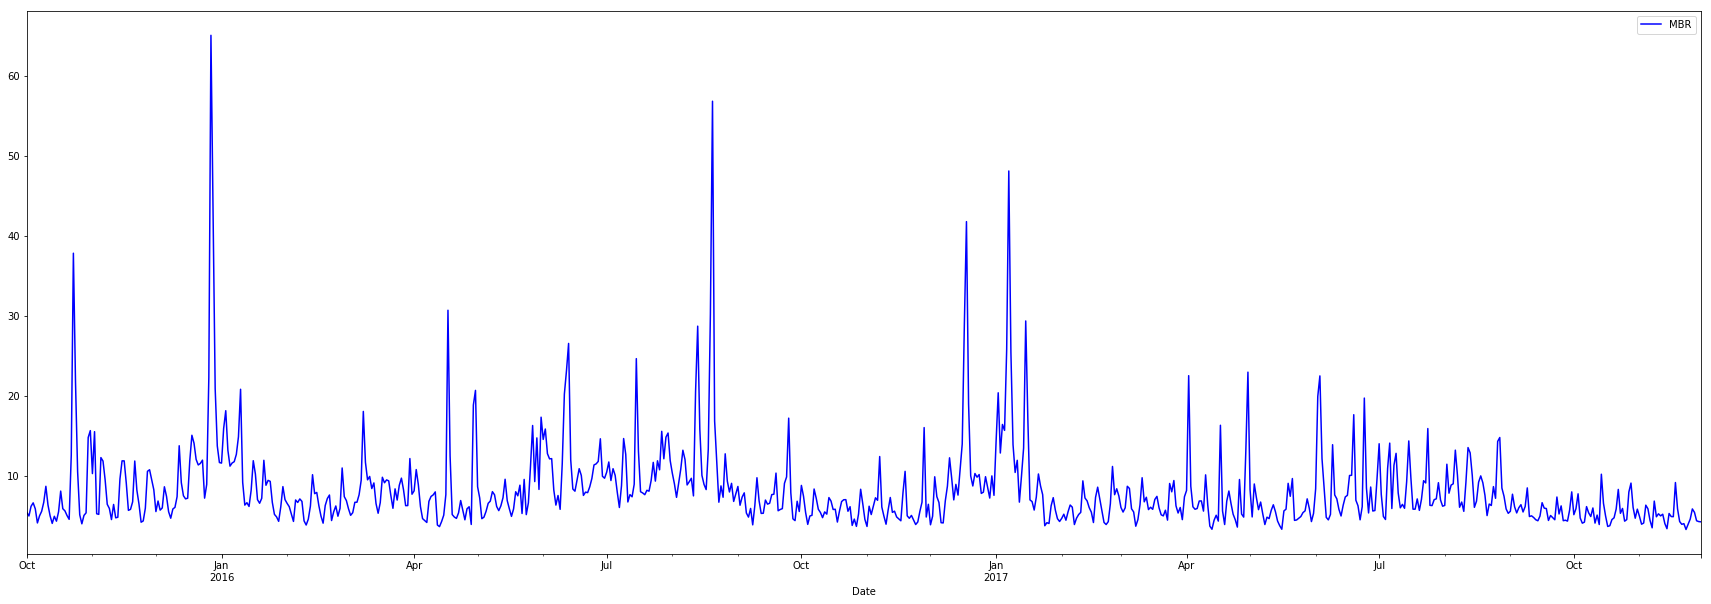

In [8]:
# Plot MBR over time
df[['MBR']].plot(color='blue', figsize=(30,10))

In [9]:
df.corr()

,Year,DOM,Numb_Passengers,Numb_Bags,MTD_Bags,Bag_Pass_Ratio,MTD_Bags.1,MBR_Day_Of,Count_Day_of,MBR_Goal,MBR,Met_Goal,A0,D0,flight_div,flights_cancelled,cnl_mech,cnl_we,cnl_other
Year,1.000000,-0.005174,0.111869,0.156742,0.033584,0.054989,0.012126,-0.130948,-0.111726,0.101547,-0.152413,-0.241450,-0.056316,0.095619,-0.090330,-0.087298,-0.149387,-0.152256,-0.026390
DOM,-0.005174,1.000000,-0.013205,0.012545,0.994285,0.018381,0.995311,0.023250,0.014888,0.013359,0.033665,0.050863,-0.025031,0.003154,0.030530,0.051047,0.008746,0.055058,-0.006240
Numb_Passengers,0.111869,-0.013205,1.000000,0.772159,0.022688,-0.259078,0.030222,-0.140381,0.082486,0.012596,-0.181489,-0.061833,-0.092056,-0.152467,-0.223651,-0.242358,0.155818,-0.277281,-0.139465
Numb_Bags,0.156742,0.012545,0.772159,1.000000,0.060220,0.401170,0.047774,0.164799,0.354570,0.205445,0.093254,-0.064227,-0.152666,-0.257193,-0.224263,-0.182102,0.194344,-0.224775,-0.105325
MTD_Bags,0.033584,0.994285,0.022688,0.060220,1.000000,0.039116,0.997331,0.041197,0.041467,0.057836,0.048911,0.029713,-0.052171,-0.023986,0.035416,0.054908,0.028296,0.055024,-0.006651
Bag_Pass_Ratio,0.054989,0.018381,-0.259078,0.401170,0.039116,1.000000,0.010238,0.419873,0.381903,0.258203,0.377029,-0.061628,-0.094077,-0.153887,-0.014461,0.072329,0.065540,0.062040,0.037298
MTD_Bags.1,0.012126,0.995311,0.030222,0.047774,0.997331,0.010238,1.000000,0.026704,0.027742,0.016141,0.035994,0.043082,-0.043307,-0.018614,0.037602,0.052527,0.032203,0.053452,-0.004713
MBR_Day_Of,-0.130948,0.023250,-0.140381,0.164799,0.041197,0.419873,0.026704,1.000000,0.964419,0.306279,0.972481,-0.011859,-0.658148,-0.740111,0.433193,0.572813,0.279036,0.553210,0.309129
Count_Day_of,-0.111726,0.014888,0.082486,0.354570,0.041467,0.381903,0.027742,0.964419,1.000000,0.333163,0.914638,-0.031151,-0.686169,-0.785436,0.341293,0.466354,0.327981,0.434911,0.267701
MBR_Goal,0.101547,0.013359,0.012596,0.205445,0.057836,0.258203,0.016141,0.306279,0.333163,1.000000,0.284951,-0.040880,-0.277225,-0.310548,0.069574,0.085342,0.179707,0.056429,0.053086


C:\Users\fcama\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  """Entry point for launching an IPython kernel.


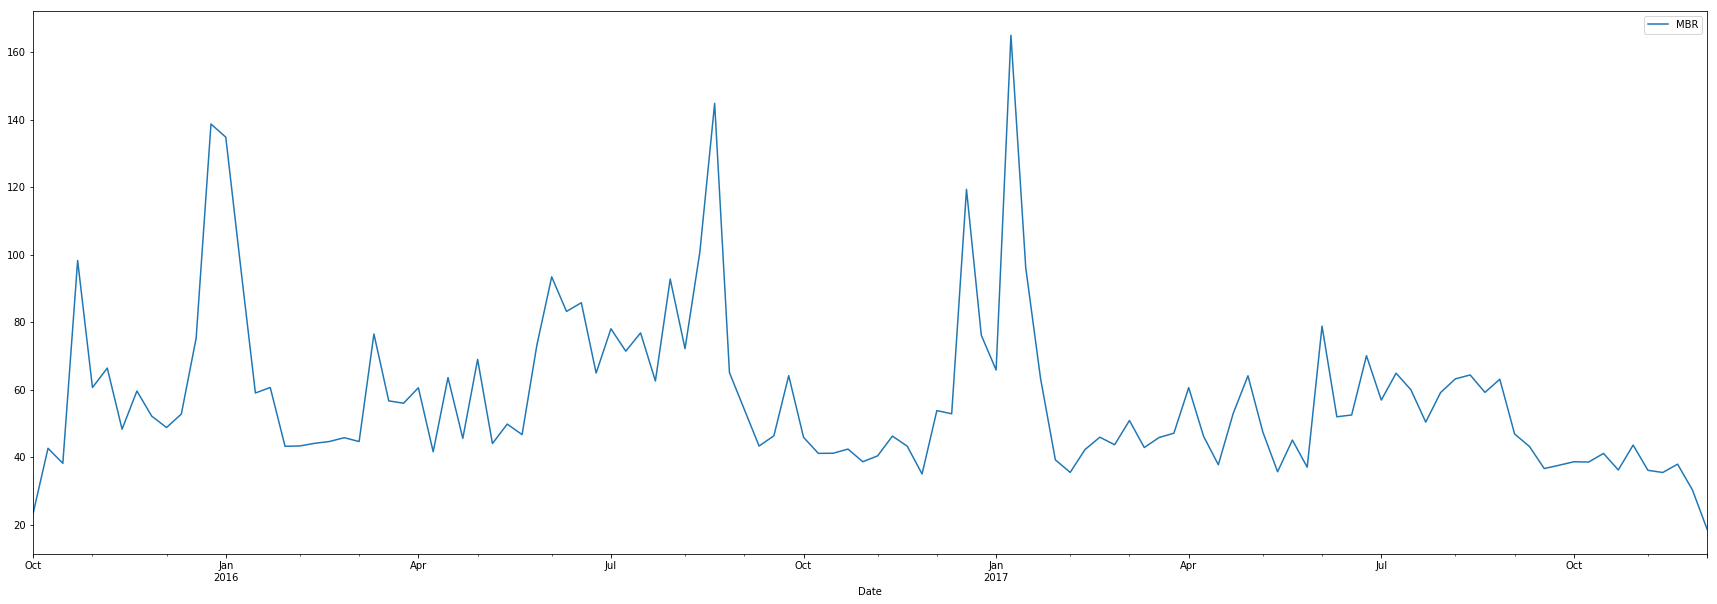

In [10]:
MBR_weekly = df[['MBR']].resample('W', 'sum', )
MBR_weekly.plot(figsize=(30,10))

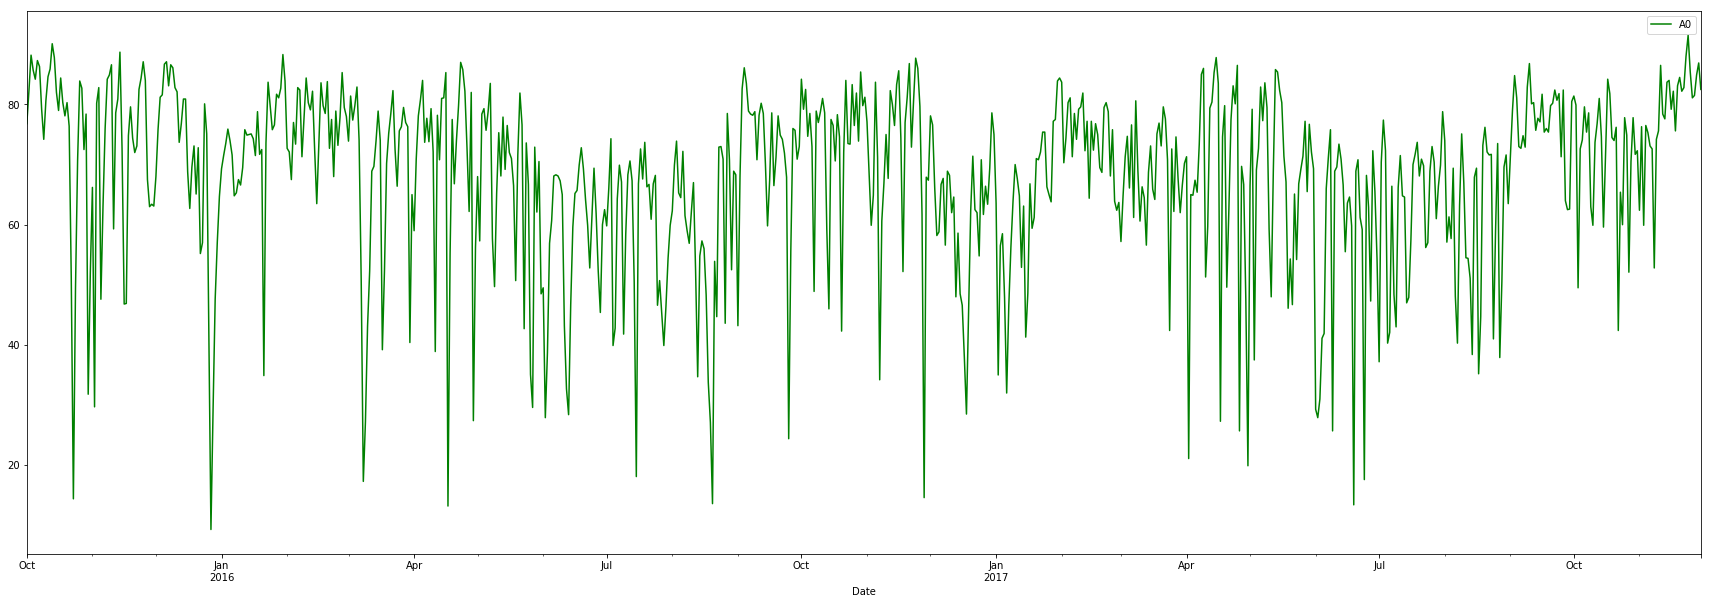

In [11]:
# Plot Arrival on time over time
df[['A0']].plot(color='green', figsize=(30,10))

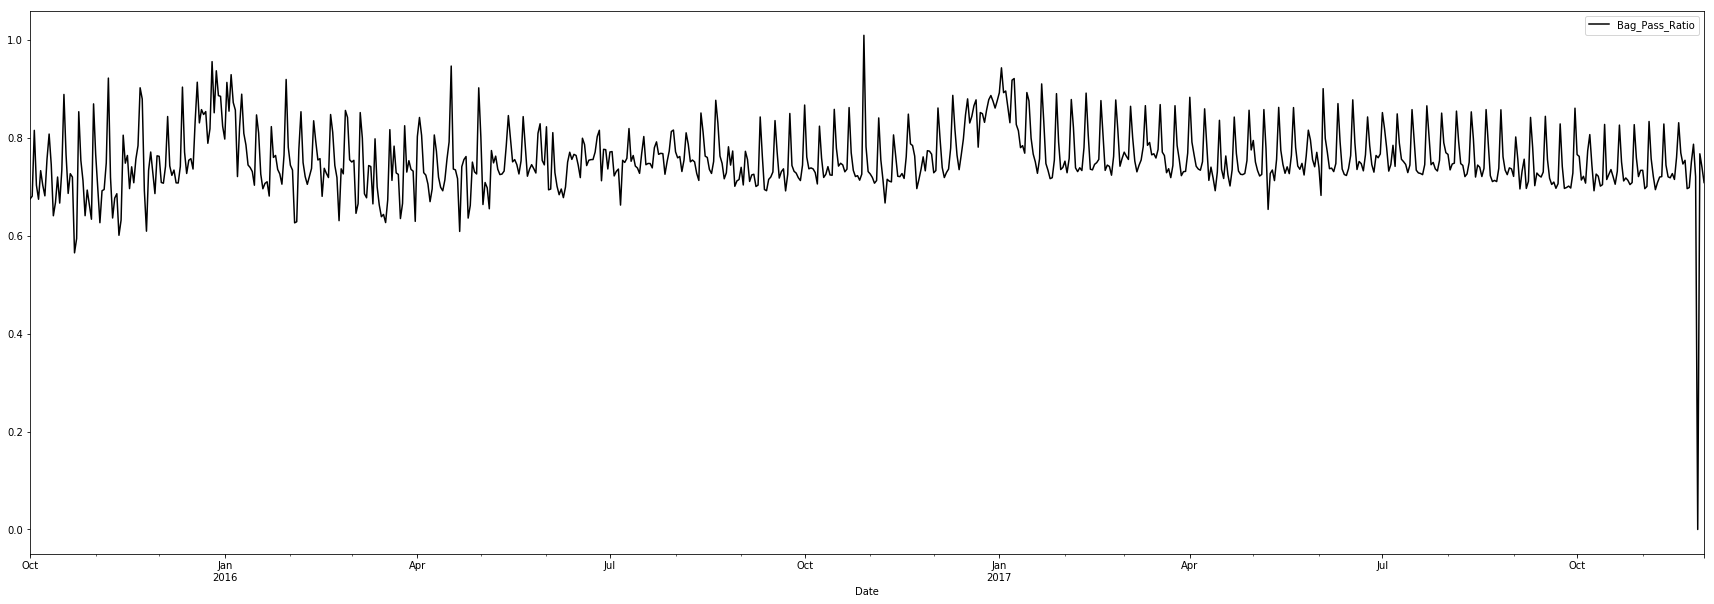

In [12]:
# Plot Arrival on time over time
df[['Bag_Pass_Ratio']].plot(color='K', figsize=(30,10))

In [13]:
Bag_Pass_Ratio_trans = df.Bag_Pass_Ratio*100
Bag_Pass_Ratio_trans.head()

Date
2015-10-01    67.503278
2015-10-02    68.070204
2015-10-03    81.517613
2015-10-04    70.319558
2015-10-05    67.446875
Name: Bag_Pass_Ratio, dtype: float64

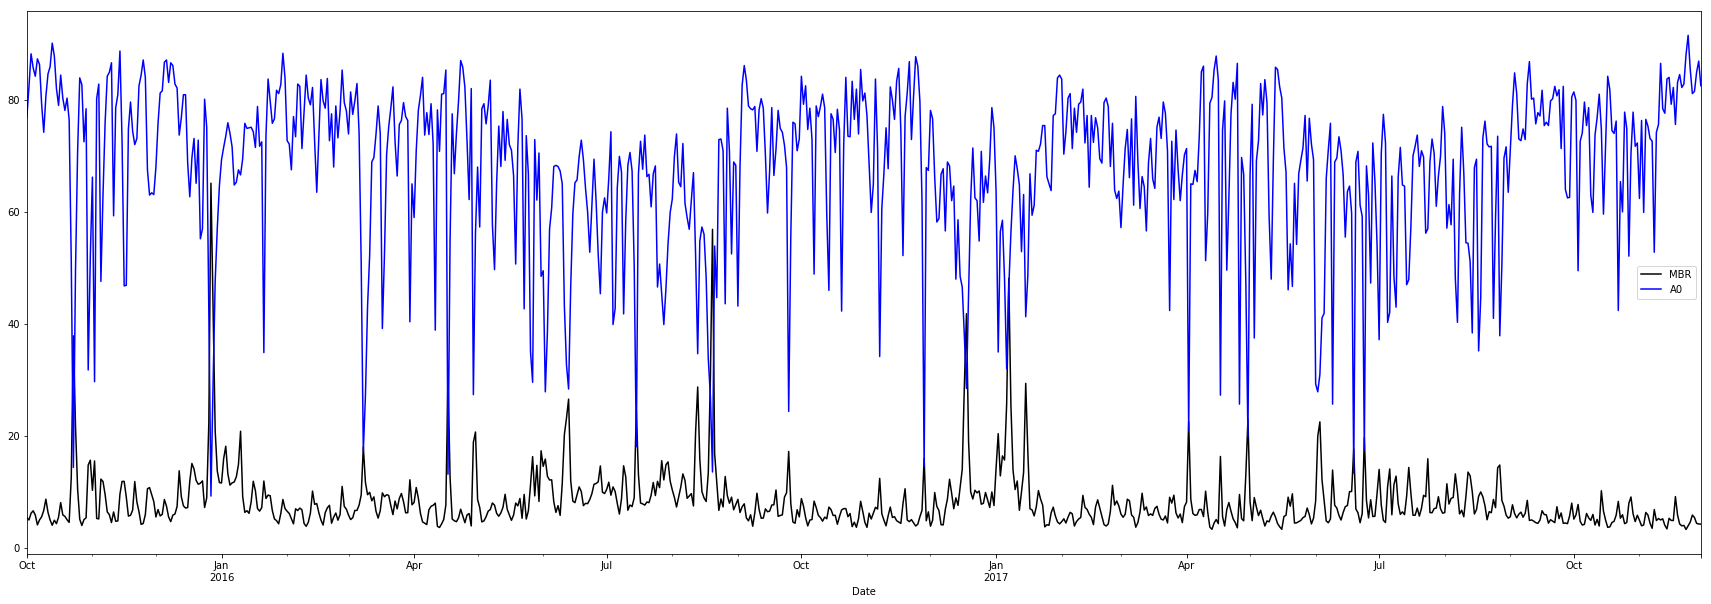

In [14]:
df[['MBR', 'A0']].plot(color=['k', 'blue', 'red'], figsize=(30,10))

## Autocorrection for different Lag values

In [15]:
df.MBR.autocorr(lag=1) # MBR Lag 1 

0.60502428717742207

In [16]:
df.MBR.autocorr(lag=2) # MBR Lag 2 

0.27108973216077109

In [17]:
df.MBR.autocorr(lag=3) # MBR Lag 3

0.12453587357707382

In [18]:
df.MBR.autocorr(lag=7) # MBR Lag 7

0.2999271261612339

## Autocorrection Plots
### We can plot the correlation coefficient for each lag variable.
The plot provides the lag number along the x-axis and the correlation coeeficient value between -1 and 1 on the y-axis.
The plot also includes a solid and dashed lines that indicate the 95% and 99% confidence interval for th ecorrelation values. Correlation values above these lines are more significant than those below the line providing a threshold or cutoff for selecting more relevant lag values.


C:\Users\fcama\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


[0, 30, -0.2, 0.65]

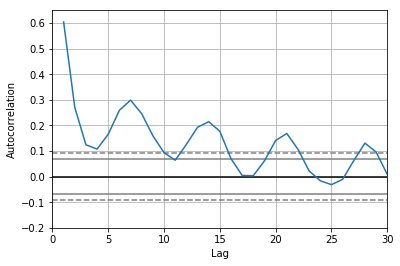

In [19]:
from pandas.tools.plotting import autocorrelation_plot

ax = autocorrelation_plot(df.MBR)
ax.axis([0,30,-.2,.65])

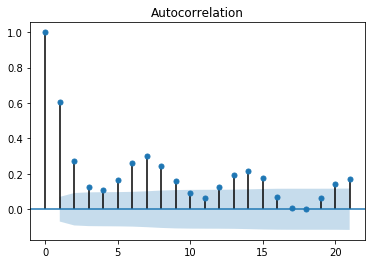

In [20]:
# Look at the plot as vertical line scatter plot.
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

plot_acf(df.MBR, lags=21)
plt.show()

In [22]:
plot_acf(model.resid, lags=40)
plt.show()

NameError: name 'model' is not defined

# A useful statistic is the Durbin Watson statistic to see if you have captured all the autocorrelation
Information in the model: If its close to 2, then the model has no autocorrelation


In [ ]:
import statsmodels.api as sm
sm.stats.durbin_watson(model.resid.values)

# Another useful statistic is the Augmented Dickey-Fuller test
The Augmented Dickey-Fuller test is a type of statistical test called a unit root test.
The intuition behind a unit root test is that it determines how strongly a time series is defined by a trend.
There are a number of unit root tests and the Augmented Dickey-Fuller may be one of the more widely used. It uses an autoregressive model and optimizes an information criterion across multiple different lag values.
The null hypothesis of the test is that the time series can be represented by a unit root, that it is not stationary (has some time-dependent structure). The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary.


Null Hypothesis (H0): If accepted, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.
Alternate Hypothesis (H1): The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.


We interpret this result using the p-value from the test. A p-value below a threshold (such as 5% or 1%) suggests we reject the null hypothesis (stationary), otherwise a p-value above the threshold suggests we accept the null hypothesis (non-stationary).
p-value > 0.05: Accept the null hypothesis (H0), the data has a unit root and is non-stationary.
p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

In [23]:
from pandas import Series
from statsmodels.tsa.stattools import adfuller
result = adfuller(df.MBR)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -6.290464
p-value: 0.000000
Critical Values:
	5%: -2.865
	1%: -3.439
	10%: -2.569


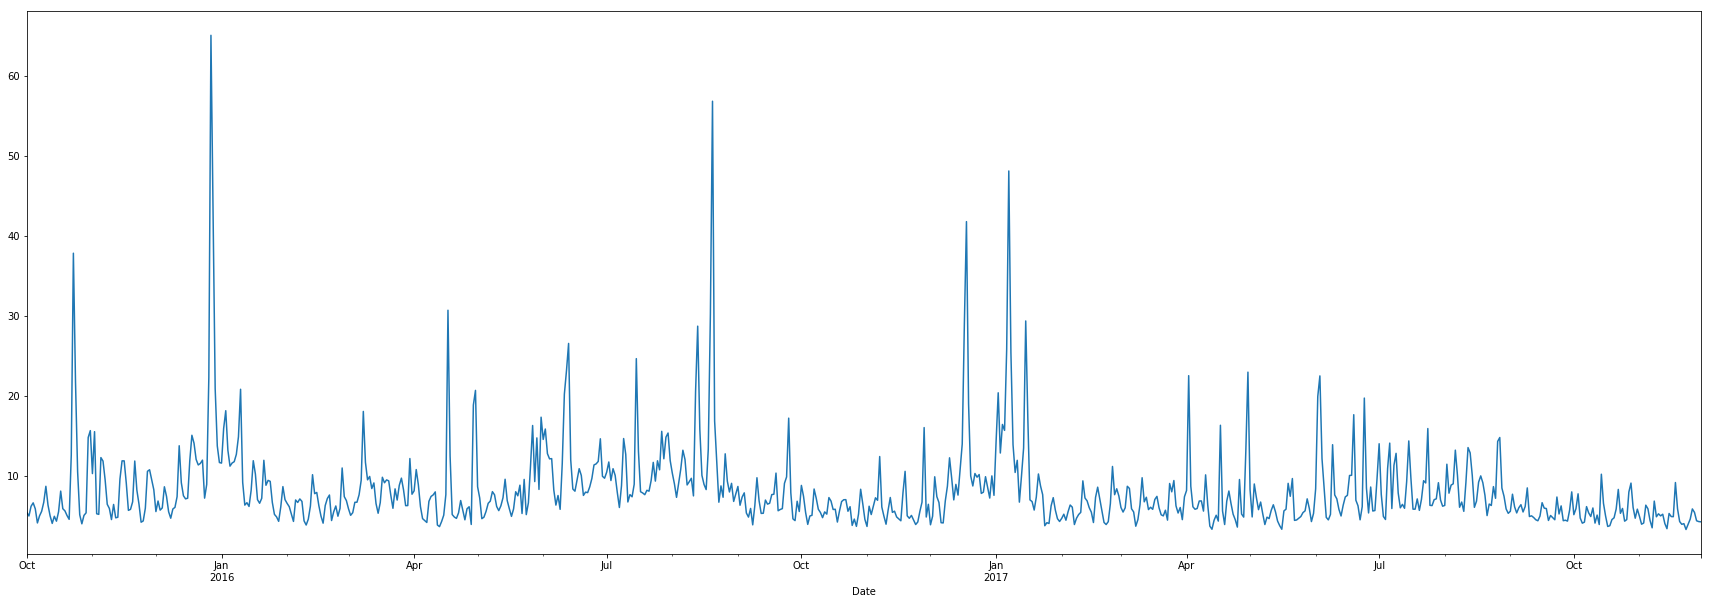

In [24]:
df.MBR.plot(figsize=(30,10))

#### Spliting the MBR data in a training and test set - using 75% of the data for training & 25% for testing

In [25]:
n = len(df.MBR)
train = df.MBR[:int(.80*n)]
test = df.MBR[int(.80*n):]

In [26]:
print train.index.min()
print train.index.max()

2015-10-01 00:00:00
2017-06-24 00:00:00


In [27]:
print test.index.min()
print test.index.max()

2017-06-25 00:00:00
2017-11-30 00:00:00


2017-06-24 00:00:00


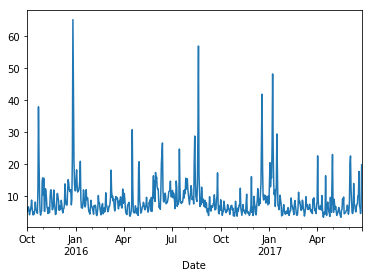

In [28]:
train.plot()
print train.index.max()

2017-06-24 00:00:00


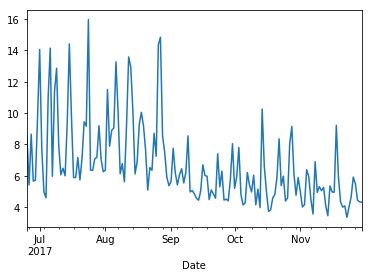

In [29]:
test.plot()
print train.index.max()

# ARIMA Time Series Model

In [30]:
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.arima_model import ARIMA

In [31]:
from statsmodels.tsa.arima_model import ARIMA
# AR 3 and MA 4 model
model = ARIMA(df.MBR, (1, 0, 1)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                    MBR   No. Observations:                  792
Model:                     ARMA(1, 1)   Log Likelihood               -2277.697
Method:                       css-mle   S.D. of innovations              4.291
Date:                Mon, 04 Dec 2017   AIC                           4563.395
Time:                        17:09:01   BIC                           4582.093
Sample:                    10-01-2015   HQIC                          4570.581
                         - 11-30-2017                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.3298      0.347     23.992      0.000       7.649       9.010
ar.L1.MBR      0.4550      0.049      9.241      0.000       0.359       0.552
ma.L1.MBR      0.2424      0.053      4.584      0.000       0.139       0.346
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.1977           +0.0000j            2.1977            0.0000
MA.1           -4.1251           +0.0000j            4.1251            0.5000
-----------------------------------------------------------------------------
"""

In [32]:
test.shape

(159L,)

In [43]:
predictions = model.predict(
    "2017-06-25","2017-11-30",
    dynamic=False)

print("Mean absolute error: ", mean_absolute_error(df.MBR["2017-06-25":"2017-11-30"], predictions))

('Mean absolute error: ', 1.9316006304628337)


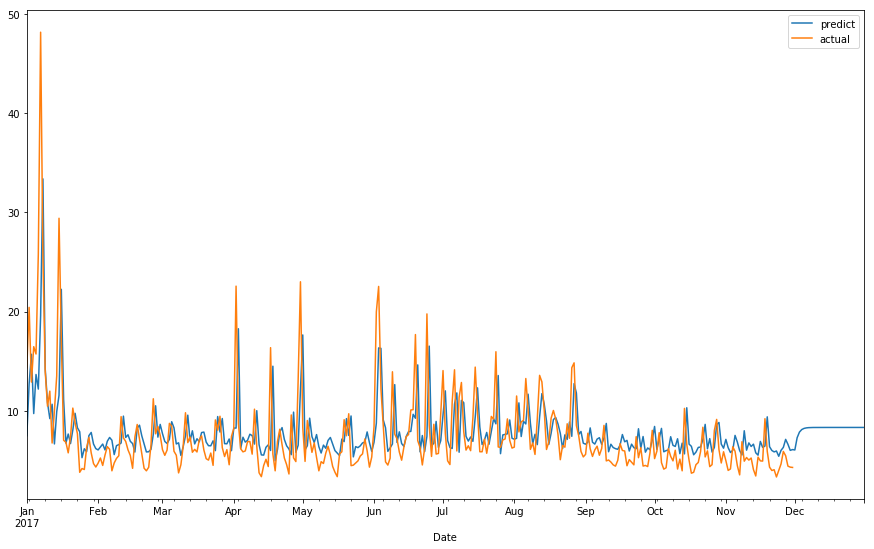

In [51]:
# Visualize the actual and prediction on the same plot
fig, axes = plt.subplots()
model.predict("2017-01-01","2017-12-31").plot(ax = axes, figsize=(15,9))
df.MBR["2017-01-01":"2017-12-31"].plot(ax = axes, figsize=(15,9))
plt.legend(["predict","actual"])

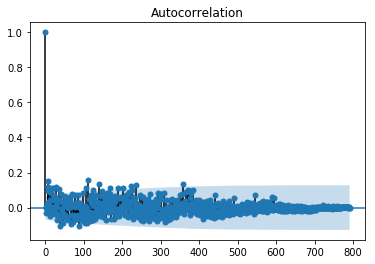

In [35]:
plot_acf(model.resid)
plt.show()

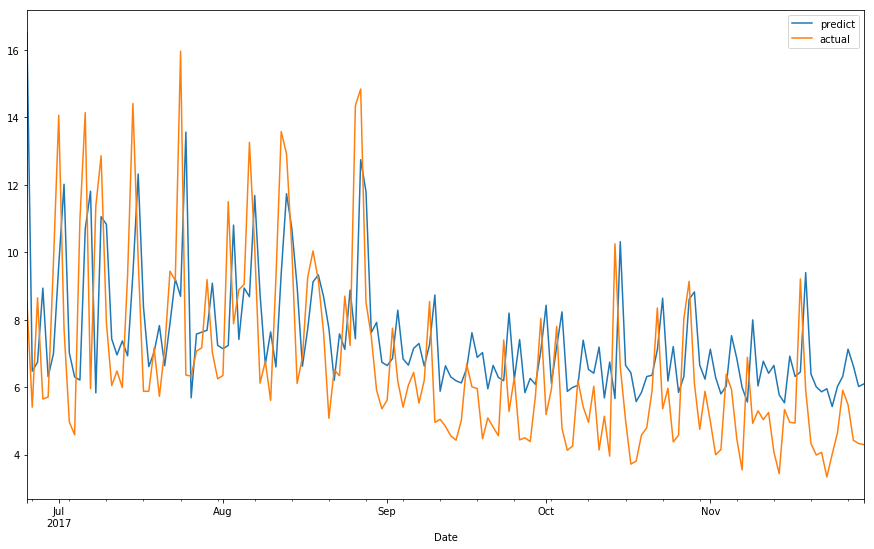

In [36]:
# Visualize the actual and prediction on the same plot
fig, axes = plt.subplots()
predictions.plot(ax = axes, figsize=(15,9))
test.plot(ax = axes, figsize=(15,9))
plt.legend(["predict","actual"])

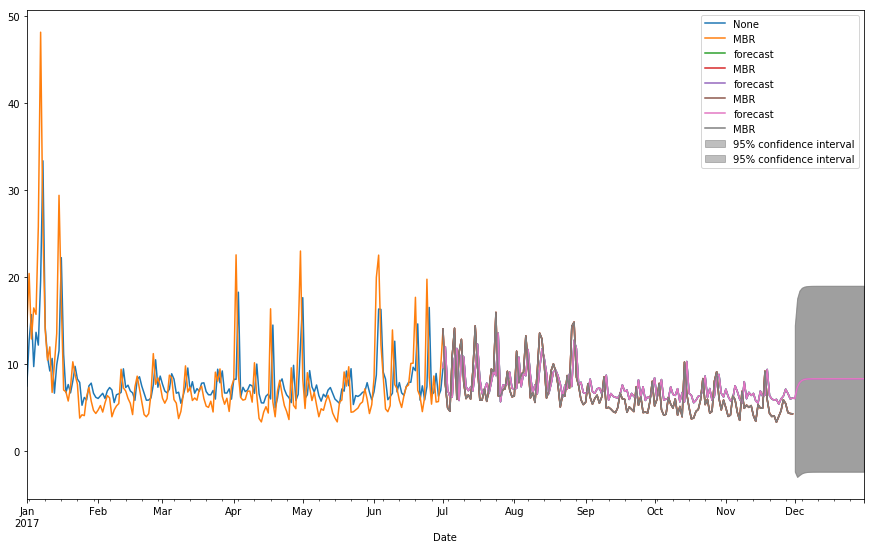

In [47]:
# Another way of plotting actual and prediction though its unclear why this is different than before
model.plot_predict("2017-07-01","2017-12-31", ax = axes)

In [48]:
model2 = sm.tsa.statespace.SARIMAX(df.MBR, order=(1,0,2), seasonal_order=(1,0,0,52), simple_differencing=True)
res= model2.fit(disp=False)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                MBR   No. Observations:                  792
Model:             SARIMAX(1, 0, 2)x(1, 0, 0, 52)   Log Likelihood               -2283.835
Date:                            Mon, 04 Dec 2017   AIC                           4577.671
Time:                                    17:22:06   BIC                           4601.044
Sample:                                10-01-2015   HQIC                          4586.654
                                     - 11-30-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9967      0.004    261.572      0.000       0.989       1.004
ma.L1         -0.6151      0.057    -10.846      0.000      -0.726      -0.504
ma.L2         -0.5635      0.030    -18.620      0.000      -0.623      -0.504
ar.S.L52      -0.0654      0.050     -1.295      0.195      -0.164       0.034
sigma2        14.9025      0.720     20.710      0.000      13.492      16.313
===================================================================================
Ljung-Box (Q):                      151.77   Jarque-Bera (JB):             33789.74
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.38   Skew:                             3.91
Prob(H) (two-sided):                  0.00   Kurtosis:                        34.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

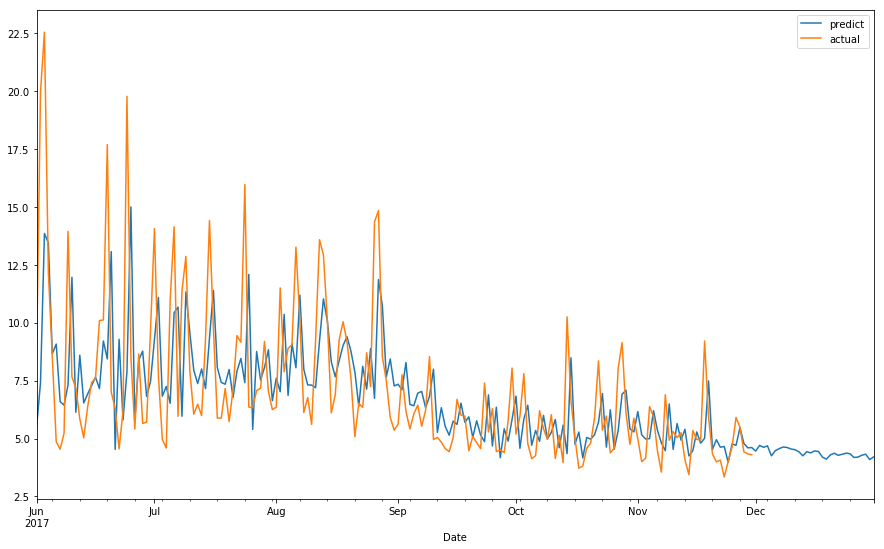

In [39]:
fig, axes = plt.subplots()
res.predict("2017-06-01","2017-12-31").plot(ax = axes, figsize=(15,9))
df.MBR["2017-06-01":"2017-11-30"].plot(ax = axes, figsize=(15,9))
plt.legend(["predict","actual"])